# Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to predict whether any person is suffering from heart disease

In [32]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
data = pd.read_csv("dataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### No null data found 

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Feature Selection

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)

In [7]:
# seems like some of the columns have worst outliers. Let's see correlation. 
# How these columns are affecting target column

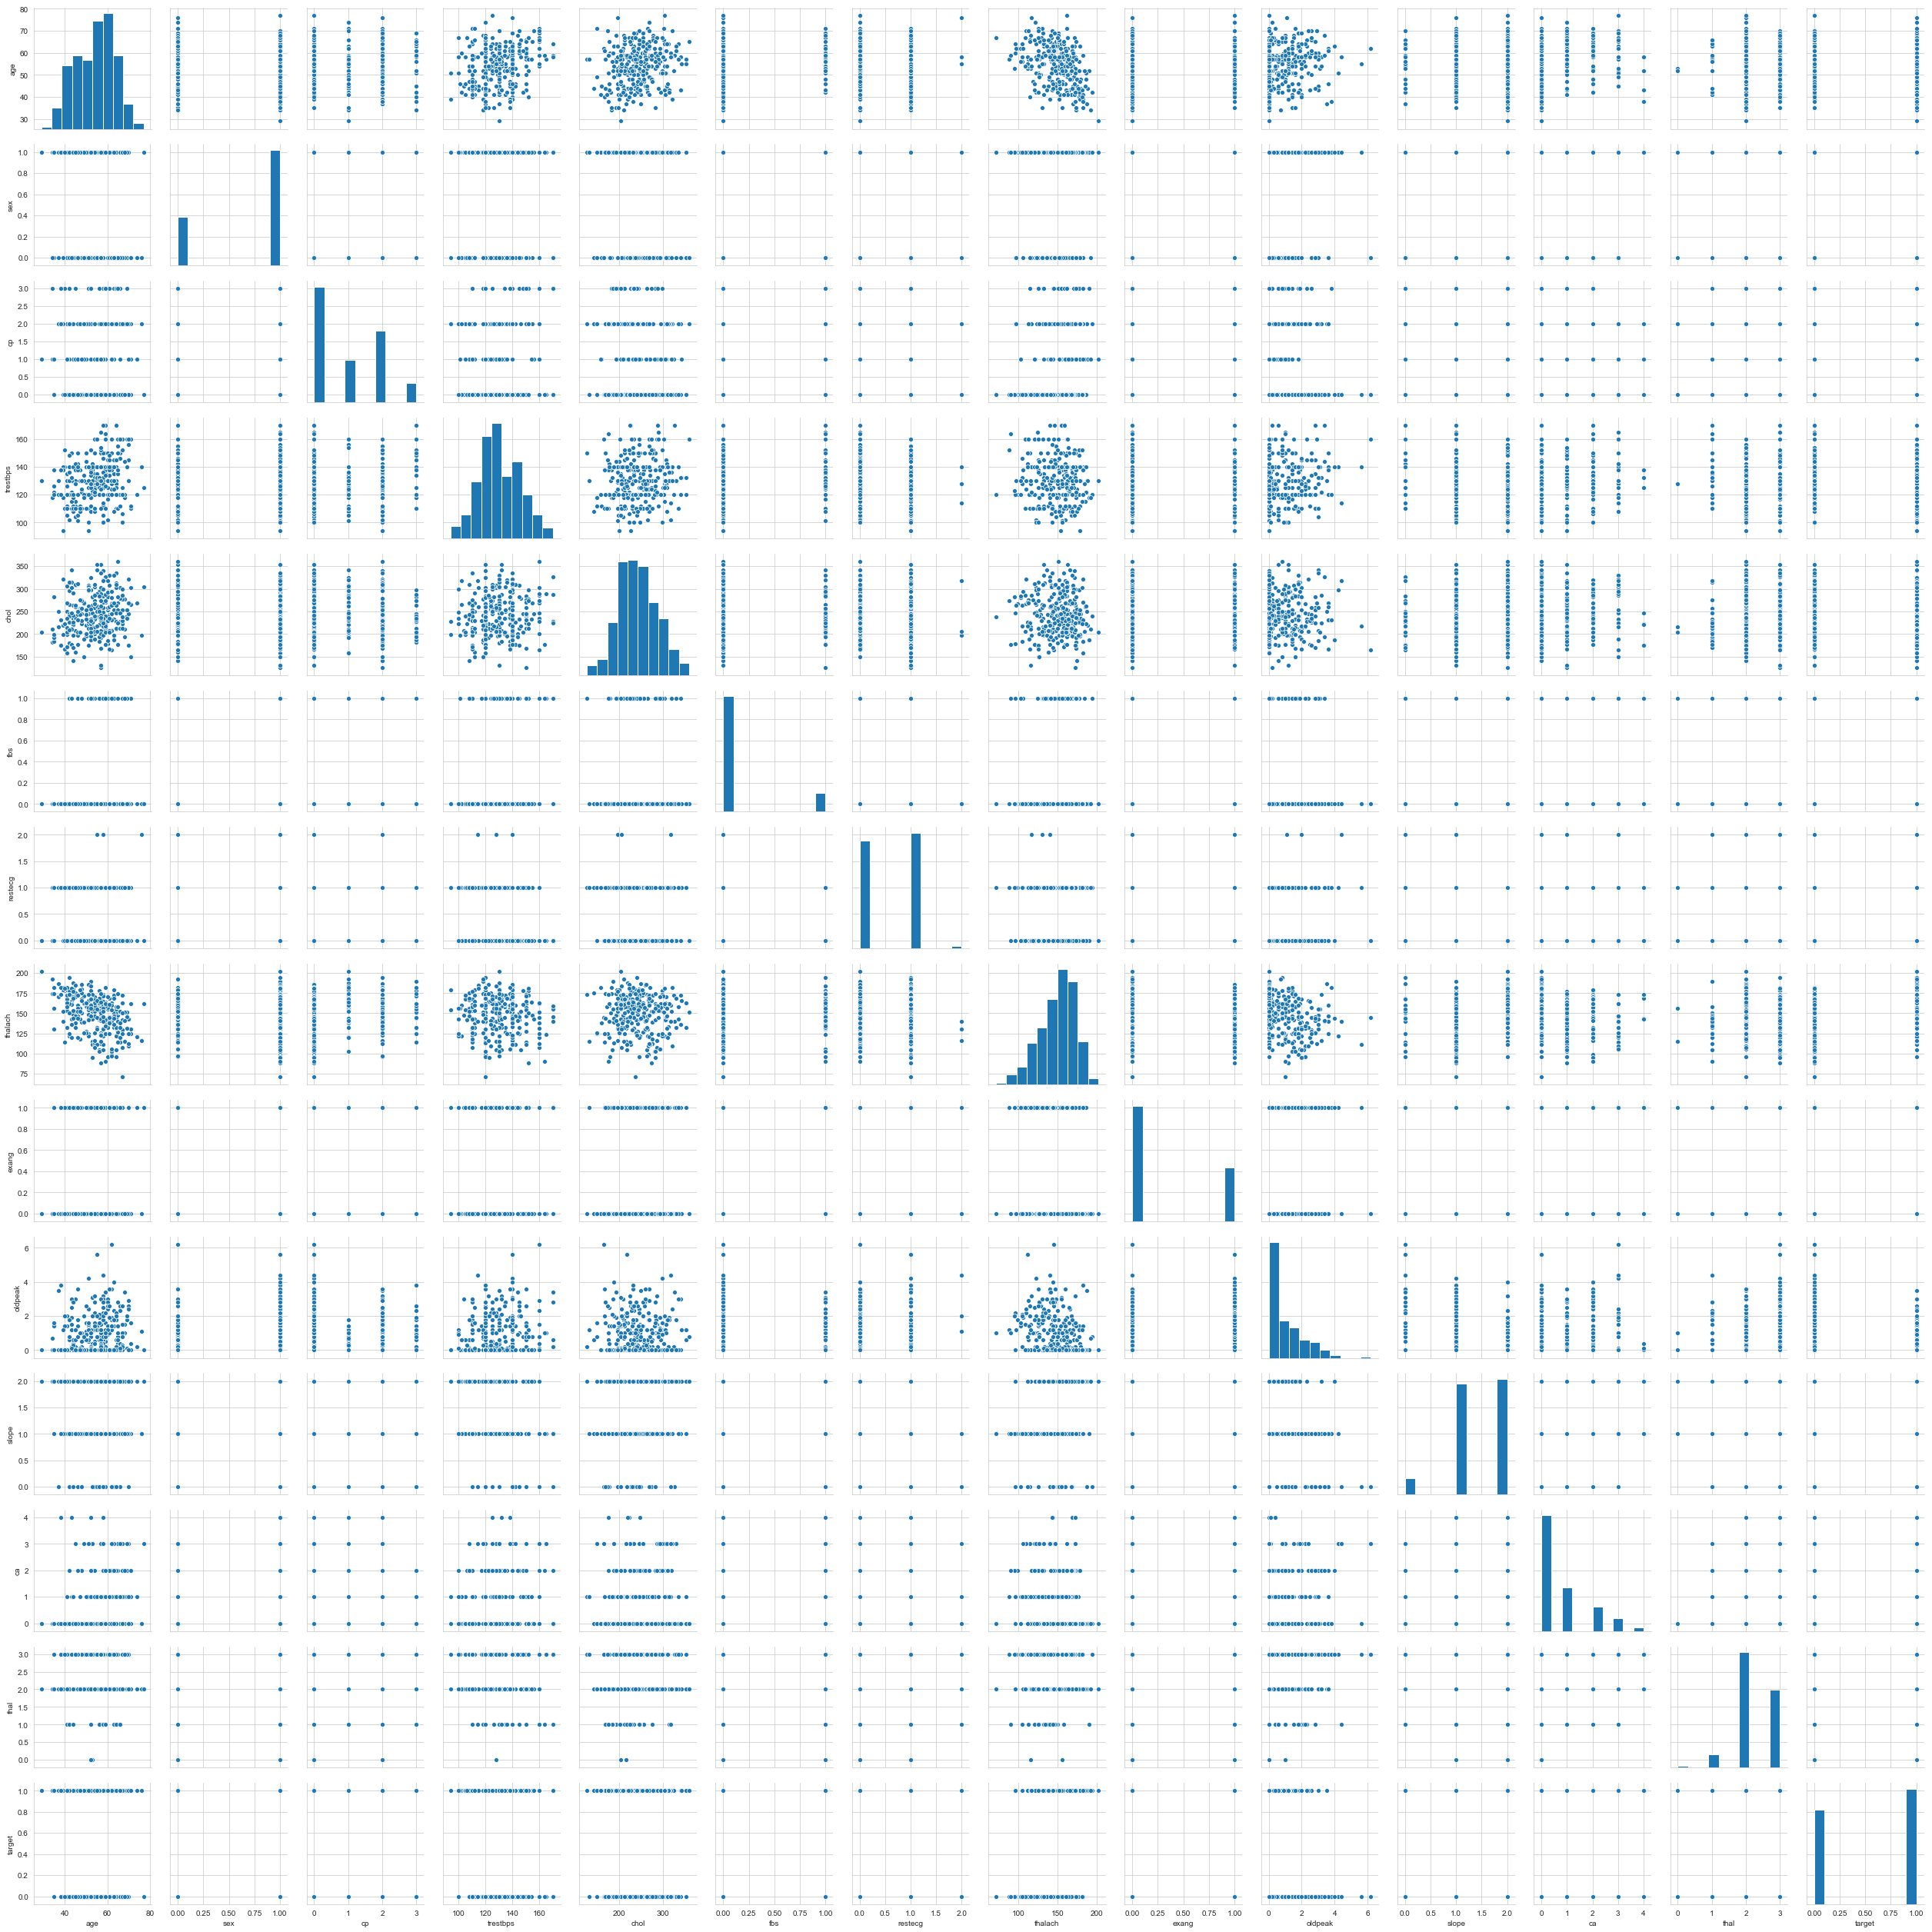

In [41]:
## Scatter Plot to check data distribution

sns.pairplot(data)
plt.show()

### Correlation

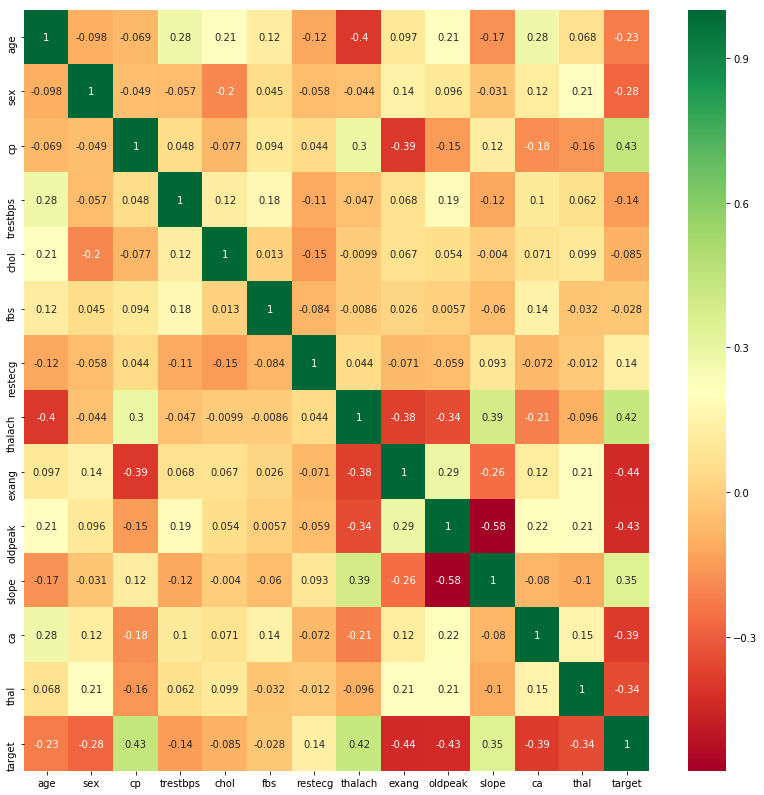

In [8]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

Let's remove outliers using Qauntiles

Outliers are those which are in (Q1 - 1.5 IQR ) and (Q3 + 1.5 IQR)

where IQR is Inter Quartile Range (Q3 - Q1), where Q1 is 25 percentile and Q3 is 75 percintile

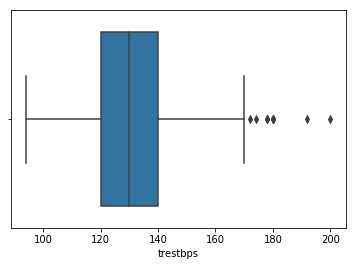

In [9]:
# Let's boxplot against "trestbps"

sns.boxplot(data['trestbps'])

In [10]:
def remove_outlier_from_data(col):
    Q3 = data[col].quantile(.75)
    Q1 = data[col].quantile(.25)
    IQR = Q3 - Q1
    df = data[~((data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR))]
    return df


In [11]:
data = remove_outlier_from_data('trestbps')

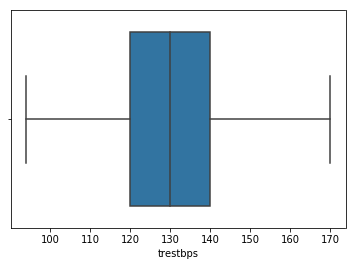

In [12]:
# Let's boxplot against "trestbps" in check outlier

sns.boxplot(data['trestbps'])

Now outlier is removed from "trestbps"

Let's remove outlier's from 'chol'

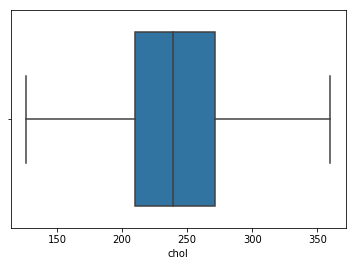

In [13]:
data = remove_outlier_from_data('chol')
# Let's boxplot against "chol" in check outlier
sns.boxplot(data['chol'])

We can see that there is no outliers in 'chol' now

#### Let's check whether dataset are balanced or not across target values

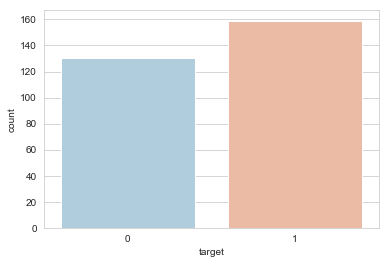

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')

Its clear that dataset not almost balanced and now we can go further and start data processing


### Data Processing

Let's first take care of categorical variables by creating dummy columns using 'get_dummies'

In [15]:
data_2 = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [16]:
data_2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


Now let's scale data which helps to normalise the data within a particular range.
We will use here StandardScaler

In [17]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
col_to_scale = ['age','trestbps','chol','thalach','oldpeak']

data_2[col_to_scale] = standard_scaler.fit_transform(data_2[col_to_scale])

In [18]:
data_2.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,2.890000e+02,289.000000,289.000000,289.000000,289.000000,289.000000,...,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,9.066181e-17,-5.698929e-16,1.086213e-16,2.289595e-16,3.365243e-16,0.550173,0.297578,0.702422,0.467128,0.169550,...,0.477509,0.577855,0.217993,0.121107,0.065744,0.017301,0.006920,0.062284,0.557093,0.373702
std,1.001735e+00,1.001735e+00,1.001735e+00,1.001735e+00,1.001735e+00,0.498339,0.457986,0.457986,0.499784,0.375888,...,0.500360,0.494758,0.413599,0.326818,0.248264,0.130617,0.083044,0.242089,0.497591,0.484625
min,-2.750680e+00,-2.341579e+00,-2.587429e+00,-3.396329e+00,-8.908241e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.759300e-01,-6.502761e-01,-7.163408e-01,-7.566199e-01,-8.908241e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.017364e-01,2.250869e-04,-7.037004e-02,1.088586e-01,-3.596381e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.502780e-01,6.507263e-01,6.424253e-01,8.012415e-01,5.256720e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.515319e+00,2.602230e+00,2.624887e+00,2.272555e+00,4.598098e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
## Before start creating our model its very necessary to check which kind of models we are going to use for our dataset
## To do so lets use cross validation mechanism to make sure that whichever algo we choose gives us best prediction/accuracy


y = data_2['target']
x = data_2.drop(['target'], axis = 1)



In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Here we will be experimenting with following algorithms :

1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier
4. XGBClassifier


#### 1. KNeighborsClassifier

Text(0.5,1,'K Neighbors Classifier scores for different K values')

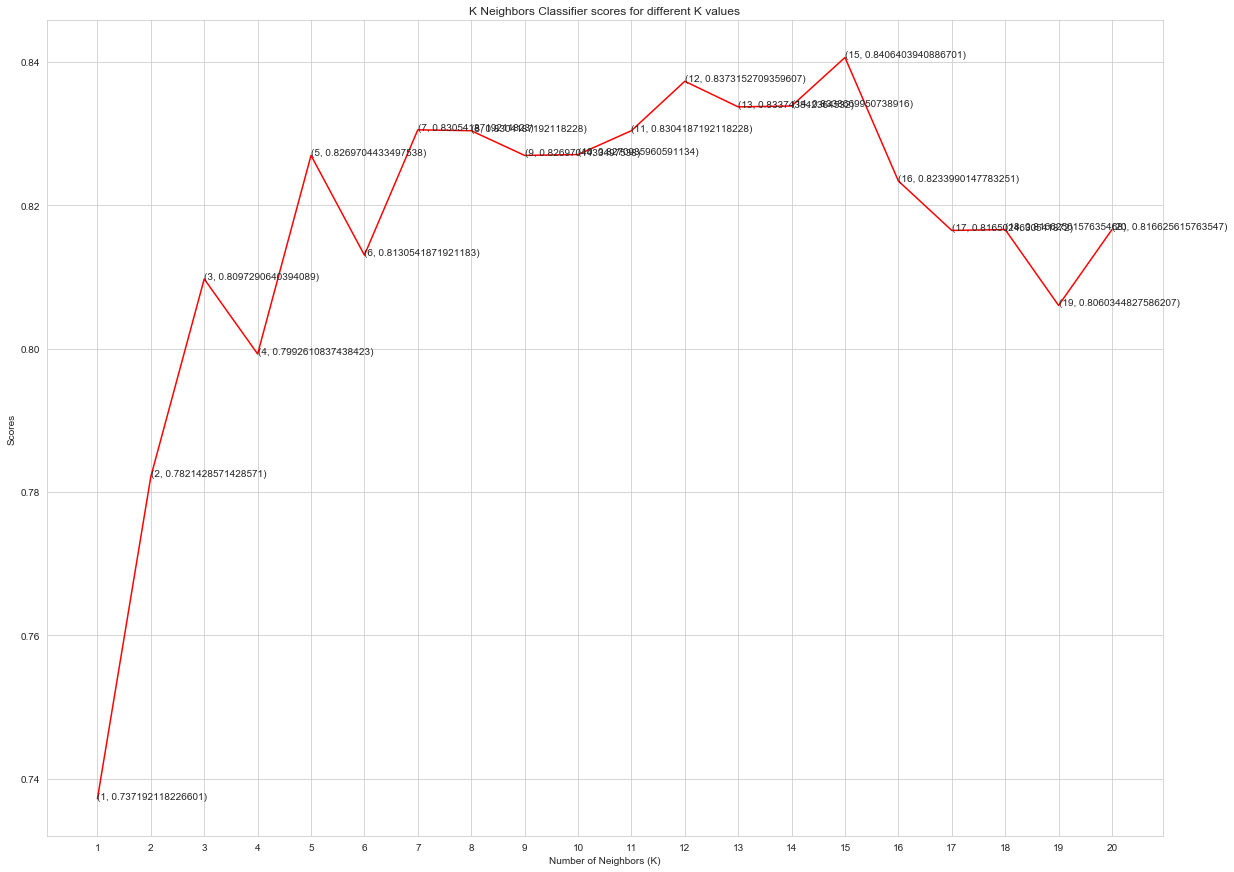

In [21]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())
    

plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')


In above graph we can clearly see that 'n_neighbors' = 15 we are getting highest accuracy

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors=15)
score = cross_val_score(knn_classifier,x,y,cv=10)
score.mean()

0.8406403940886701

###### Using KNeighborsClassifier we are getting accuracy of 84% for 'n_estimators' = 15

#### 2. DecisionTreeClassifier

In [23]:
decisiontree = DecisionTreeClassifier(max_features=15)
score = cross_val_score(decisiontree,x,y,cv=10)
score.mean()

0.7370689655172413

Text(0.5,1,'DecisionTreeClassifier scores for different K features')

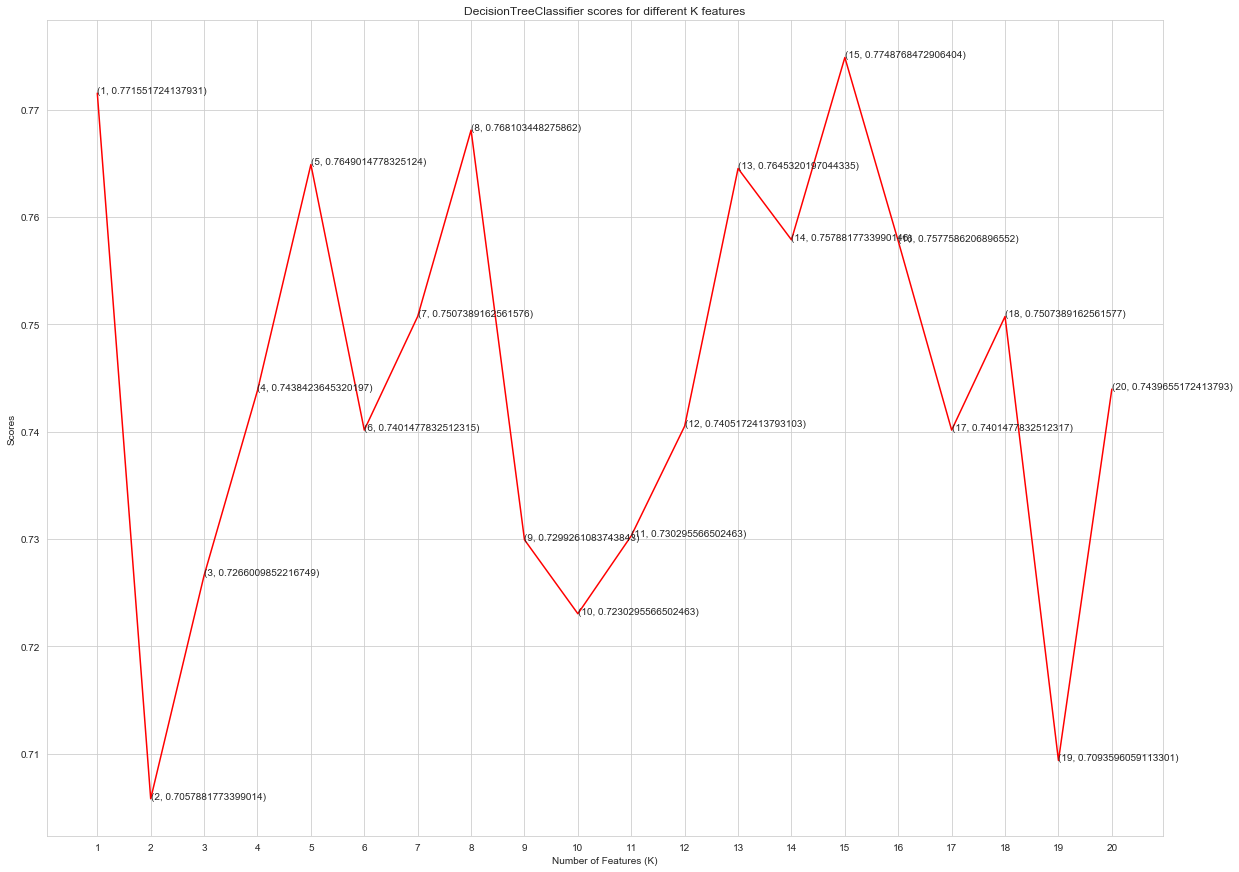

In [24]:
dt_scores = []
for k in range(1,21):
    decisiontree = DecisionTreeClassifier(max_features=k)
    score=cross_val_score(decisiontree,x,y,cv=10)
    dt_scores.append(score.mean())
    

plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], dt_scores, color = 'red')
for i in range(1,21):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Features (K)')
plt.ylabel('Scores')
plt.title('DecisionTreeClassifier scores for different K features')

we can clearly see from above graph that we are getting maximum accuracy of 79% with 'max_features' = 11 
which is lesser than KNeighborsClassifier.

#### 3. RandomForestClassifier

Text(0.5,1,'RandomForestClassifier scores for different K features')

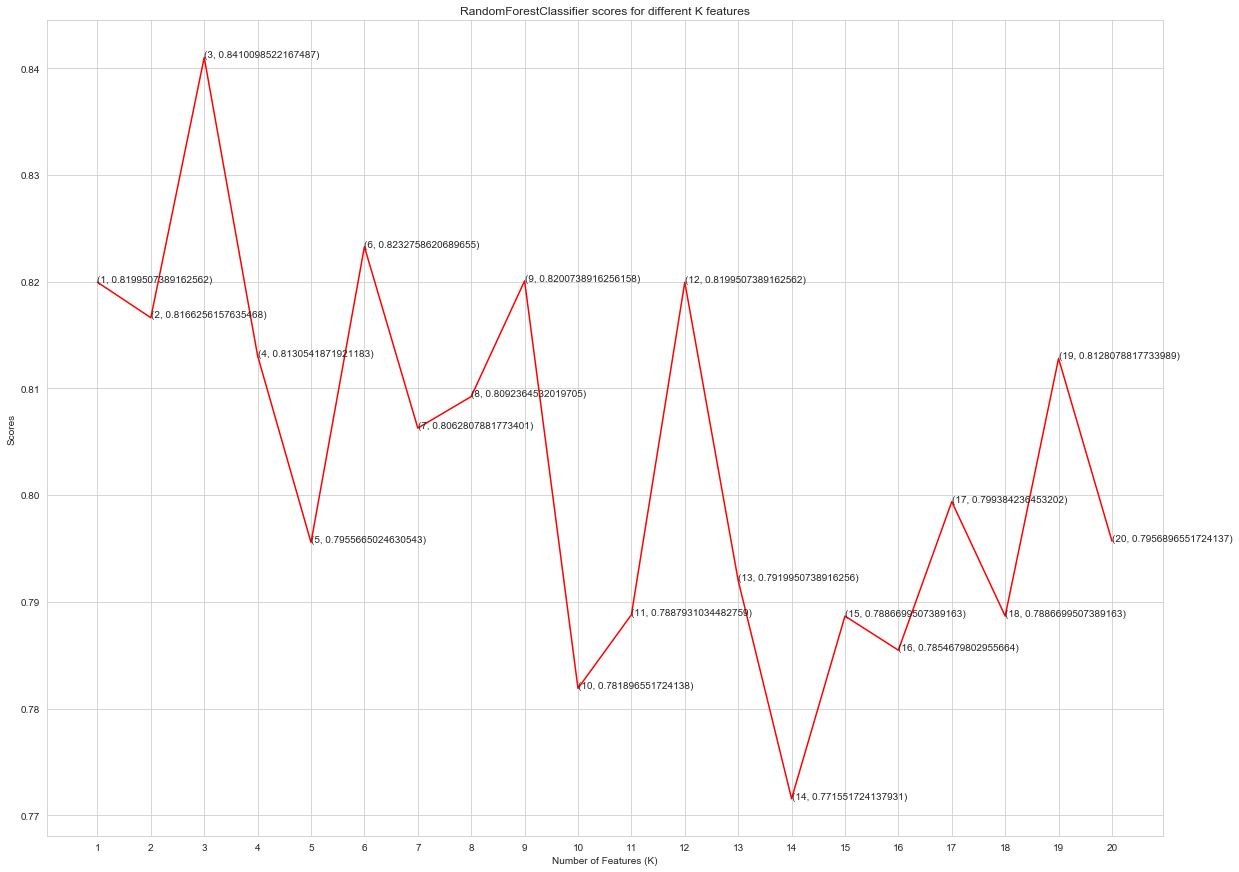

In [25]:
rf_scores = []
for k in range(1,21):
    randomforest = RandomForestClassifier(max_features=k)
    score = cross_val_score(randomforest,x,y,cv=10)
    rf_scores.append(score.mean())
    
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1,21)] ,rf_scores,  color = 'red')
for i in range(1,21):
     plt.text(i, rf_scores[i-1], (i, rf_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Features (K)')
plt.ylabel('Scores')
plt.title('RandomForestClassifier scores for different K features')

We can see in above graph that with 'max_features' = 17 gives us highest accuracy of 81.9% 
which is still lesser than KNeighborsClassifier

#### 4. XGBClassifier

Text(0.5,1,'XGBClassifier scores for different K max_depth')

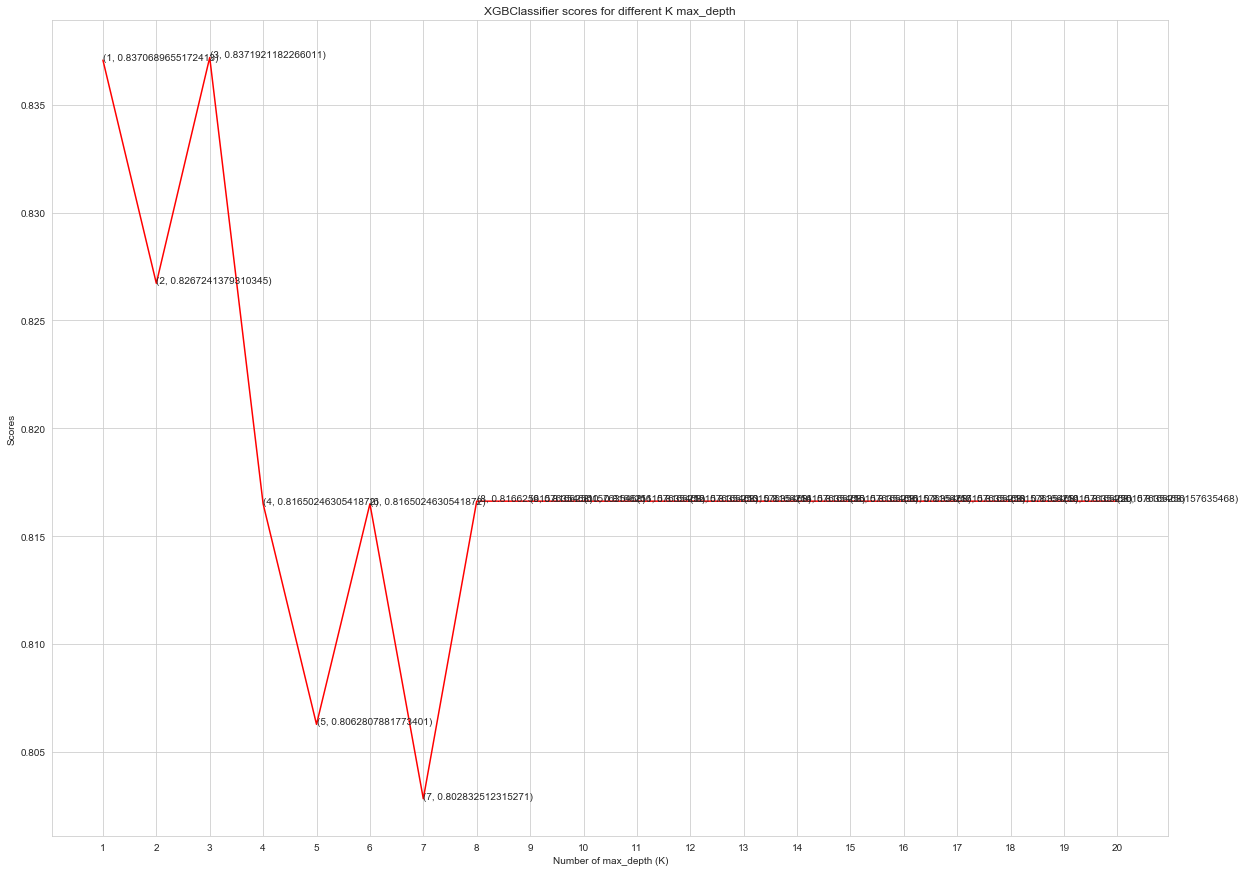

In [36]:
xgb_scores = []
for k in range(1,21):
    xgbClassifier = XGBClassifier(max_depth=k)
    score = cross_val_score(xgbClassifier,x,y,cv=10)
    xgb_scores.append(score.mean())
    
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1,21)] ,xgb_scores,  color = 'red')
for i in range(1,21):
     plt.text(i, xgb_scores[i-1], (i, xgb_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of max_depth (K)')
plt.ylabel('Scores')
plt.title('XGBClassifier scores for different K max_depth')

After comparing all algorithms we find out that KNeighborClassifier is giving us highest accuracy among these, 
so let's create model using KNeighborClassifier

In [43]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)

### KNeighborClassifier

In [64]:
from sklearn.grid_search import GridSearchCV

param_grid = {'n_neighbors':[15]}
knn_classifier = KNeighborsClassifier()

grid = GridSearchCV(knn_classifier, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x,y)



GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1, param_grid={'n_neighbors': [15]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [66]:
y_predict = grid.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test,y_predict)
cm_knn

array([[39, 10],
       [ 3, 44]])

In [68]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test,y_predict)
acc_score

0.8645833333333334

#### So after using GridSearchCV our accuracy increased to 86%

### Residual Analysis 

Text(0.5,0,'Errors')

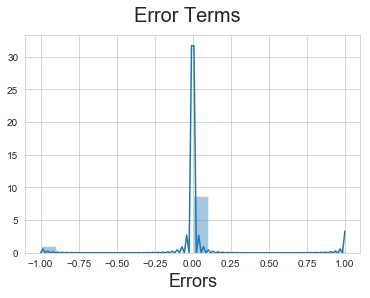

In [76]:
import matplotlib.pyplot as plt

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label